<h1> <font color="blue"> <center> GIS Application in Civil Engineering

<h3> <font color="green"> <center> Washemuzzaman Lajuk

<hr>

#Data from: https://gis-txdot.opendata.arcgis.com/datasets/9b2eb7d232584572ad53bad41c76b04d_0/explore?location=30.866735%2C-100.049436%2C6.41

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

In [23]:
path = "/home/fortbend/Lajuk/Texas_data/"
fname = 'County_Boundaries.shp'
os.chdir(path)

In [24]:
texas = gpd.read_file(fname)

In [25]:
texas.head()

,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,geometry
0,232,232,48463,232,15,Uvalde,232,15,35,"POLYGON ((-11076323.621 3386738.492, -11076452..."
1,143,143,48285,143,13,Lavaca,143,13,36,"POLYGON ((-10783021.183 3456095.21, -10783006...."
2,20,20,48039,20,12,Brazoria,20,12,37,"POLYGON ((-10606980.495 3451945.262, -10606969..."
3,241,241,48481,241,13,Wharton,241,13,38,"POLYGON ((-10706181.772 3456563.942, -10706152..."
4,163,163,48325,163,15,Medina,163,15,39,"POLYGON ((-11066621.012 3397753.016, -11066621..."


In [26]:
texas.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

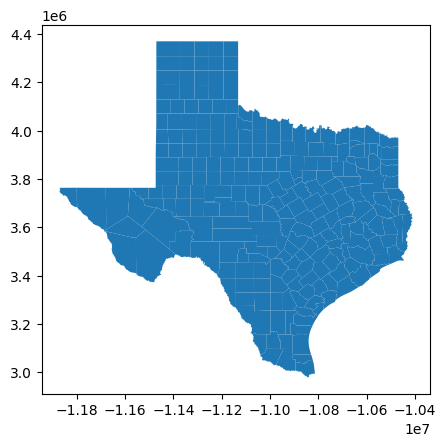

In [27]:
texas.plot()

In [28]:
#Conver CRS Values
texasGCS84 = texas.to_crs(epsg=4326)
texasGCS84.head()

,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,geometry
0,232,232,48463,232,15,Uvalde,232,15,35,"POLYGON ((-99.50031 29.08711, -99.50147 29.087..."
1,143,143,48285,143,13,Lavaca,143,13,36,"POLYGON ((-96.86553 29.63014, -96.8654 29.6300..."
2,20,20,48039,20,12,Brazoria,20,12,37,"POLYGON ((-95.28413 29.59773, -95.28403 29.597..."
3,241,241,48481,241,13,Wharton,241,13,38,"POLYGON ((-96.17527 29.6338, -96.17501 29.6336..."
4,163,163,48325,163,15,Medina,163,15,39,"POLYGON ((-99.41315 29.17354, -99.41315 29.180..."


In [30]:
texasNAD27 = texas.to_crs(epsg=4267)
texasNAD27.head()

,CMPTRL_CNT,DPS_CNTY_N,FIPS_ST_CN,TXDOT_CNTY,TXDOT_DIST,CNTY_NM,CNTY_NBR,DIST_NBR,GID,geometry
0,232,232,48463,232,15,Uvalde,232,15,35,"POLYGON ((-99.49996 29.08687, -99.50112 29.086..."
1,143,143,48285,143,13,Lavaca,143,13,36,"POLYGON ((-96.86525 29.6299, -96.86512 29.6298..."
2,20,20,48039,20,12,Brazoria,20,12,37,"POLYGON ((-95.28389 29.59749, -95.28379 29.597..."
3,241,241,48481,241,13,Wharton,241,13,38,"POLYGON ((-96.17501 29.63356, -96.17475 29.633..."
4,163,163,48325,163,15,Medina,163,15,39,"POLYGON ((-99.4128 29.17331, -99.4128 29.18028..."


<Axes: >

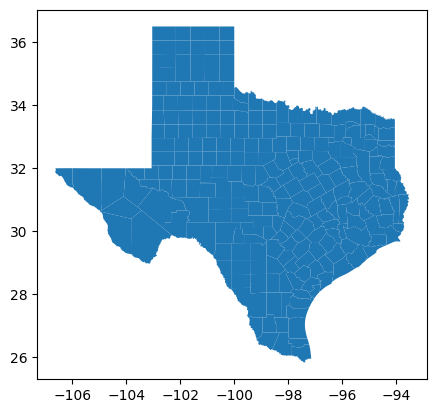

In [31]:
texasGCS84.plot()

<Axes: >

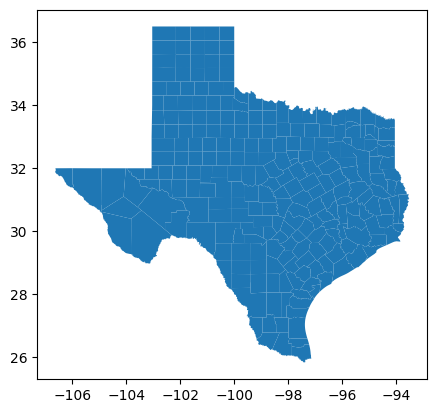

In [32]:
texasNAD27.plot()

In [33]:
texasUTM14N = texasGCS84.to_crs(epsg=32614)
texasUTM15N = texasGCS84.to_crs(epsg=32615)


In [37]:
#CF is sqm to sqmi
CF=3.861021585E-07
texasUTM14N['Areasqmi'] = texasUTM14N.area*CF
texasUTM15N['Areasqmi'] = texasUTM15N.area*CF

In [40]:
#np.float64
texasUTM14N.Areasqmi.mean()

1053.1870940753276

In [41]:
texasUTM15N.Areasqmi.mean()

1062.5293178099982

In [42]:
texasAEC = texasGCS84.to_crs(epsg=5070)

<Axes: >

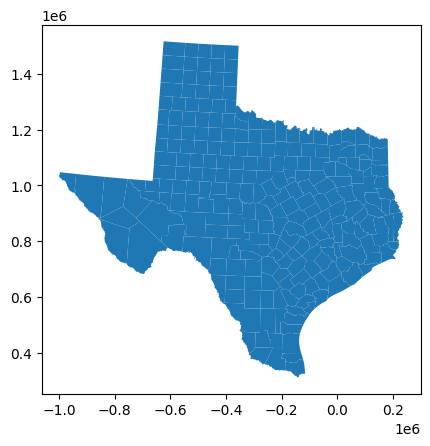

In [43]:
texasAEC.plot()

In [44]:
texasAEC['Areasqmi'] = texasAEC.area*CF

In [45]:
texasAEC.Areasqmi.mean()

1052.0961562520463

In [48]:
AECmean = texasAEC.Areasqmi.mean()

In [51]:
AECmean = float(AECmean)         # Convert to float
round(AECmean, 3)     # Round to 3 decimal places and reassign

1052.096